<a href="https://colab.research.google.com/github/khoaphamj1505/CS114.L11.KHCL/blob/master/Folio/Folio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import pandas as pd
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split,cross_val_score


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
dir ='/content/gdrive/MyDrive/PythonML/Data/Folio%20Leaf%20Dataset.rar (Unzipped Files)/Folio Leaf Dataset/Folio'
categories =['beaumier du perou','eggplant','fruitcitere','guava','hibiscus','betel','rose','chrysanthemum','ficus','duranta gold','ashanti blood','bitter orange','coeur demoiselle','jackfruit',
'mulberry leaf','pimento','pomme jacquot','star apple','barbados cherry','sweet olive','croton','thevetia','vieux garcon','chocolate tree','caricature plant','coffee','ketembilla','chinese guava','lychee','geranium','sweet potato','papaya']

In [6]:
data=[]
for category in categories:
  path=os.path.join(dir,category)
  label=categories.index(category)

  for img in os.listdir(path):
    impath=os.path.join(path,img)
    folio=cv2.imread(impath,0)
    folio=cv2.resize(folio,(50,50))
    image=np.array(folio).flatten()
    data.append([np.array(image),np.array(label)])
  
print(len(data))


637


In [7]:
print(data)

[[array([243, 244, 243, ..., 192, 195, 199], dtype=uint8), array(0)], [array([233, 236, 238, ..., 179, 175, 180], dtype=uint8), array(0)], [array([236, 240, 238, ..., 165, 179, 180], dtype=uint8), array(0)], [array([239, 240, 240, ..., 195, 191, 196], dtype=uint8), array(0)], [array([241, 241, 240, ..., 197, 201, 199], dtype=uint8), array(0)], [array([240, 241, 243, ..., 189, 192, 191], dtype=uint8), array(0)], [array([225, 224, 221, ..., 161, 158, 163], dtype=uint8), array(0)], [array([235, 234, 234, ..., 180, 179, 181], dtype=uint8), array(0)], [array([234, 237, 233, ..., 169, 178, 176], dtype=uint8), array(0)], [array([240, 239, 241, ..., 181, 183, 182], dtype=uint8), array(0)], [array([240, 240, 240, ..., 227, 229, 232], dtype=uint8), array(0)], [array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array(0)], [array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array(0)], [array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array(0)], [array([255, 255, 255, ..., 255, 

In [126]:
import random
random.shuffle(data)


In [127]:
features=[]
labels=[]

for feature, label in data:
  features.append(feature)
  labels.append(label)
  

In [128]:
print(features)
print(labels)

[array([239, 237, 237, ..., 213, 214, 215], dtype=uint8), array([243, 244, 242, ..., 220, 221, 221], dtype=uint8), array([248, 251, 248, ..., 218, 220, 222], dtype=uint8), array([181, 174, 183, ..., 242, 240, 238], dtype=uint8), array([248, 246, 245, ..., 180, 180, 184], dtype=uint8), array([254, 255, 255, ..., 229, 228, 228], dtype=uint8), array([239, 238, 239, ..., 184, 185, 184], dtype=uint8), array([228, 230, 229, ..., 182, 174, 170], dtype=uint8), array([236, 236, 238, ..., 210, 213, 214], dtype=uint8), array([241, 239, 242, ..., 201, 208, 203], dtype=uint8), array([233, 234, 233, ..., 196, 193, 194], dtype=uint8), array([234, 233, 235, ..., 209, 210, 212], dtype=uint8), array([238, 240, 241, ..., 198, 200, 196], dtype=uint8), array([241, 243, 240, ..., 215, 207, 209], dtype=uint8), array([225, 225, 226, ..., 203, 197, 198], dtype=uint8), array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([247, 247, 247, ..., 226, 220, 223], dtype=uint8), array([219, 217, 224, ..., 201

In [129]:

X_train, X_test, y_train, y_test = train_test_split(
     features,labels, test_size=0.3)

In [186]:
#train and test
knn = KNeighborsClassifier(n_neighbors=3,weights='distance',metric='braycurtis')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8177083333333334


In [188]:
print(y_pred[20:40])
print(y_test[20:40])

[20  1 25 23 12  2  8 26 15 20  8  9  0 21  8 16  2 26  2 31]
[array(20), array(1), array(25), array(23), array(12), array(2), array(8), array(8), array(15), array(20), array(8), array(9), array(0), array(21), array(8), array(16), array(2), array(20), array(27), array(31)]


1


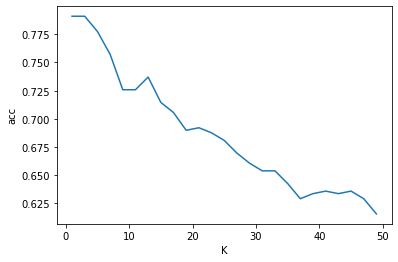

In [189]:
k_val=[i for i in range(1,50,2)]
k_acc_scores=[]
for k in k_val:
  knn = KNeighborsClassifier(n_neighbors=k,weights='distance',metric='braycurtis')
  cv_scores=cross_val_score(knn,X_train, y_train,cv=5,scoring='accuracy')
  k_acc_scores.append(cv_scores.mean())
k_max=k_val[k_acc_scores.index(max(k_acc_scores))]
print(format(k_max))
plt.plot(k_val,k_acc_scores)
plt.xlabel('K')
plt.ylabel('acc')
plt.show()
